In [1]:
# Convolutional Neural-Network

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Fix random seed
np.random.seed(3)

Using TensorFlow backend.


In [3]:
# Define args for ImageDataGenerator to create a dataset from Images (to inflate the number of data)
args = {
    'rotation_range': 10, 
    'width_shift_range': 0.2,
    'height_shift_range': 0.2, 
    'shear_range': 0.7, 
    'zoom_range': [0.9, 2.2],
    'horizontal_flip': True,
    'vertical_flip': True,
    'fill_mode': 'nearest'
}

In [4]:
# Create dataset
train_datagen = ImageDataGenerator(rescale=1./255, **args)
train_generator = train_datagen.flow_from_directory(
        'data/handmade-mnist/train',  # path to images
        target_size=(24, 24),         # size of each image
        batch_size=3,                 # batch size
        class_mode='categorical')     # classification method to use

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'data/handmade-mnist/test', 
        target_size=(24, 24), 
        batch_size=3, 
        class_mode='categorical') 

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [5]:
# Define model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

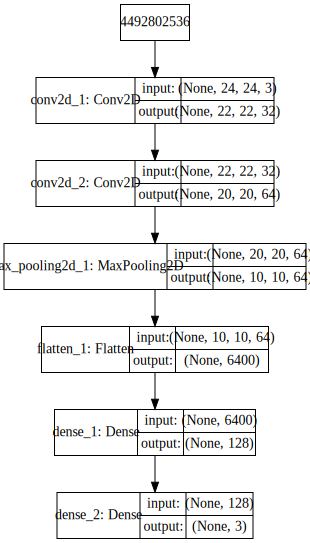

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

# Visualize the model
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
# Configure settings for the upcoming train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Train the model
model.fit_generator(
        train_generator, 
        steps_per_epoch=15,
        epochs=10,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/10
15/15 [==============================] - 1s 63ms/step - loss: 1.3270 - acc: 0.2222 - val_loss: 1.0794 - val_acc: 0.4000
Epoch 2/10
15/15 [==============================] - 0s 32ms/step - loss: 1.1005 - acc: 0.3778 - val_loss: 1.0502 - val_acc: 0.6667
Epoch 3/10
15/15 [==============================] - 0s 28ms/step - loss: 1.0740 - acc: 0.5111 - val_loss: 1.0084 - val_acc: 0.3333
Epoch 4/10
15/15 [==============================] - 0s 31ms/step - loss: 0.9840 - acc: 0.6222 - val_loss: 0.9228 - val_acc: 0.3333
Epoch 5/10
15/15 [==============================] - 0s 28ms/step - loss: 0.8740 - acc: 0.5111 - val_loss: 0.9216 - val_acc: 0.4667
Epoch 6/10
15/15 [==============================] - 0s 28ms/step - loss: 0.8084 - acc: 0.6667 - val_loss: 1.4686 - val_acc: 0.3333
Epoch 7/10
15/15 [==============================] - 0s 27ms/step - loss: 0.6766 - acc: 0.6444 - val_loss: 1.2702 - val_acc: 0.6667
Epoch 8/10
15/15 [==============================] - 0s 26ms/step - loss: 0.8542 - a

In [9]:
# Evaluate the model
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

acc: 66.67%
